In [309]:
# by crt
# python 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show>

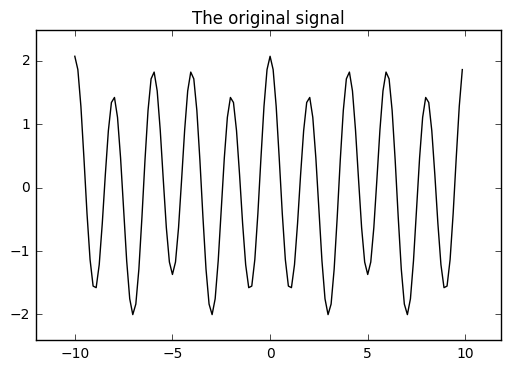

In [310]:
# number of points
N = 128

# range of time values
t_range = 20.0

#sample rate
dt = t_range/N

# time array.  The endpoint=False here avoids the first and last
#points being equivalent, which is important since FFT treats the
#first and last points of the given array as distinct
t = np.linspace(-(t_range/2), (t_range/2), N, endpoint=False) 
#t = np.linspace(0.0, t_range/2, N, endpoint=False) 



# define the original signal's frequencies and amplitudes
f_0 = 0.2
f_1 = 0.5
A_0 = 0.35
A_1 = 1.72

#Test Function #1: this one is pure real at a single wave number
#h = np.cos(2.0*np.pi*f_0*t)  

#Test Function #2: this one is both real and imaginary (since it is 
#slightly phase shifted) at a single wave number
#h = A_0*np.sin(2.0*np.pi*f_0*t + np.pi/4)

#Test Function #3: this one is pure real at two wave numbers with 
#two different amplitudes
h = A_0*np.cos(2.0*np.pi*f_0*t) + A_1*np.cos(2.0*np.pi*f_1*t)



# generate the plot of the original function
plt.title("The original signal")
plt.plot(t, h, 'k-')
# show the plot of the original function
plt.margins(0.1)
plt.show

<function matplotlib.pyplot.show>

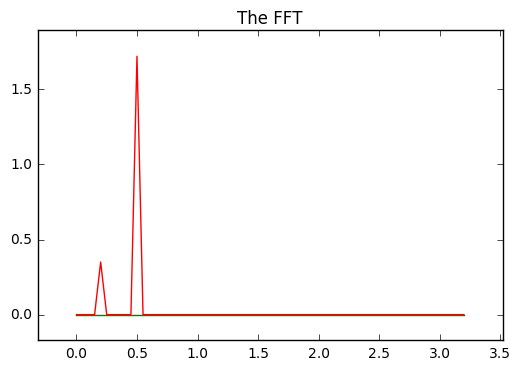

In [311]:
# forward FFT
# since the input data is real, we use rfft
amp = np.fft.rfft(h) 

# normalization (got this from an online sourse.  it's clearly 
#necessary, but I don't understand it fully.  apparently
#the 2.0 here comes from the fact that we neglect the negative
#portion of frequency space because our input function is real?)
norm = 2.0/N
amp = amp*norm

# generate frequency values
k = np.fft.rfftfreq(N)
#normalize them
freq = k/dt


# generate the plot of the FFT
plt.title("The FFT")
plt.plot(freq, amp.real, 'r-')  #real (red) is the cosine terms
plt.plot(freq, amp.imag, 'g-')  #imag (green) is the sine terms
# show the plot of the FFT
plt.margins(0.1)
plt.show

<function matplotlib.pyplot.show>

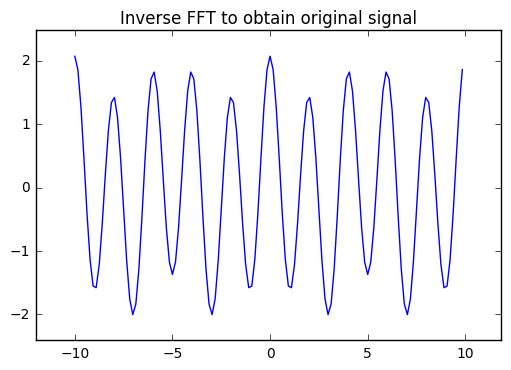

In [312]:
# inverse FFT to get the original function back
# note that we remove the normalization
h_inv = np.fft.irfft(amp/norm)

# generate the plot of the original function again
plt.title('Inverse FFT to obtain original signal')
plt.plot(t, h_inv.real, 'b-')
# show the plot of the original function again
plt.margins(0.1)
plt.show

<function matplotlib.pyplot.show>

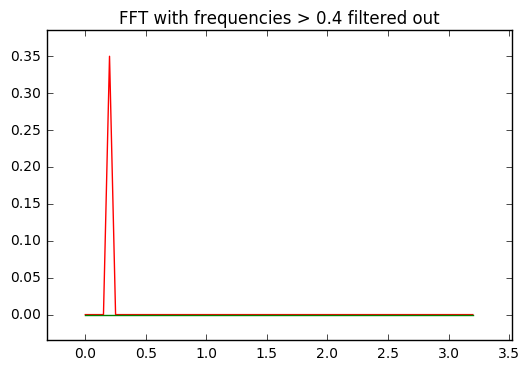

In [313]:
#**FILTERING STUFF**
# let's do it again, but this time let's filter out frequencies > 0.4

# forward FFT
# since the input data is real, we use rfft
amp = np.fft.rfft(h) 

# normalization
norm = 2.0/N
amp = amp*norm

# generate frequency values
k = np.fft.rfftfreq(N)
#normalize them
freq = k/dt

# set the amplitude to zero when the frequency > 0.4
amp[freq > 0.4] = 0.0


# generate the plot of the FFT
plt.title('FFT with frequencies > 0.4 filtered out')
plt.plot(freq, amp.real, 'r-')  #real (red) is the cosine terms
plt.plot(freq, amp.imag, 'g-')  #imag (green) is the sine terms
#plt.plot(frequency, abs(amplitude), 'g-')  #imag is the sine terms
# show the plot of the FFT
plt.margins(0.1)
plt.show

<function matplotlib.pyplot.show>

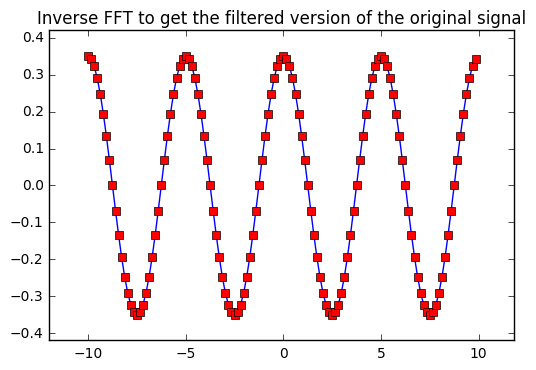

In [314]:
# inverse FFT to get the (filtered) function back
#note that we remove the normalization
h_inv = np.fft.irfft(amp/norm)

#also plot just the low-frequency part of the original function to test that
#this is working correctly.  this should match the blue
test = A_0*np.cos(2.0*np.pi*f_0*t)

# generate the plot of the (filtered) function again
plt.title('Inverse FFT to get the filtered version of the original signal')
plt.plot(t, h_inv.real, 'b-')
plt.plot(t, test, 'rs')
# show the plot of the (filtered) function again
plt.margins(0.1)
plt.show

In [316]:
# Citation: I got some of the ideas for my implementation from
#http://bender.astro.sunysb.edu/classes/phy688_spring2013/